This project aims to predict charges for an insurance premium company using Python. Leveraging the simplicity and effectiveness of linear regression, we'll analyze customer data, including age, sex, region and much more, to uncover patterns influencing insurance charges. Through data visualization and predictive modeling, we seek to enhance premium pricing strategies for more accurate and informed decision-making in the insurance industry

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
%matplotlib inline

# Importing Datasets

In [2]:
df=pd.read_csv(r"C:\Users\alika\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(7,3)
matplotlib.rcParams['figure.facecolor']='white'

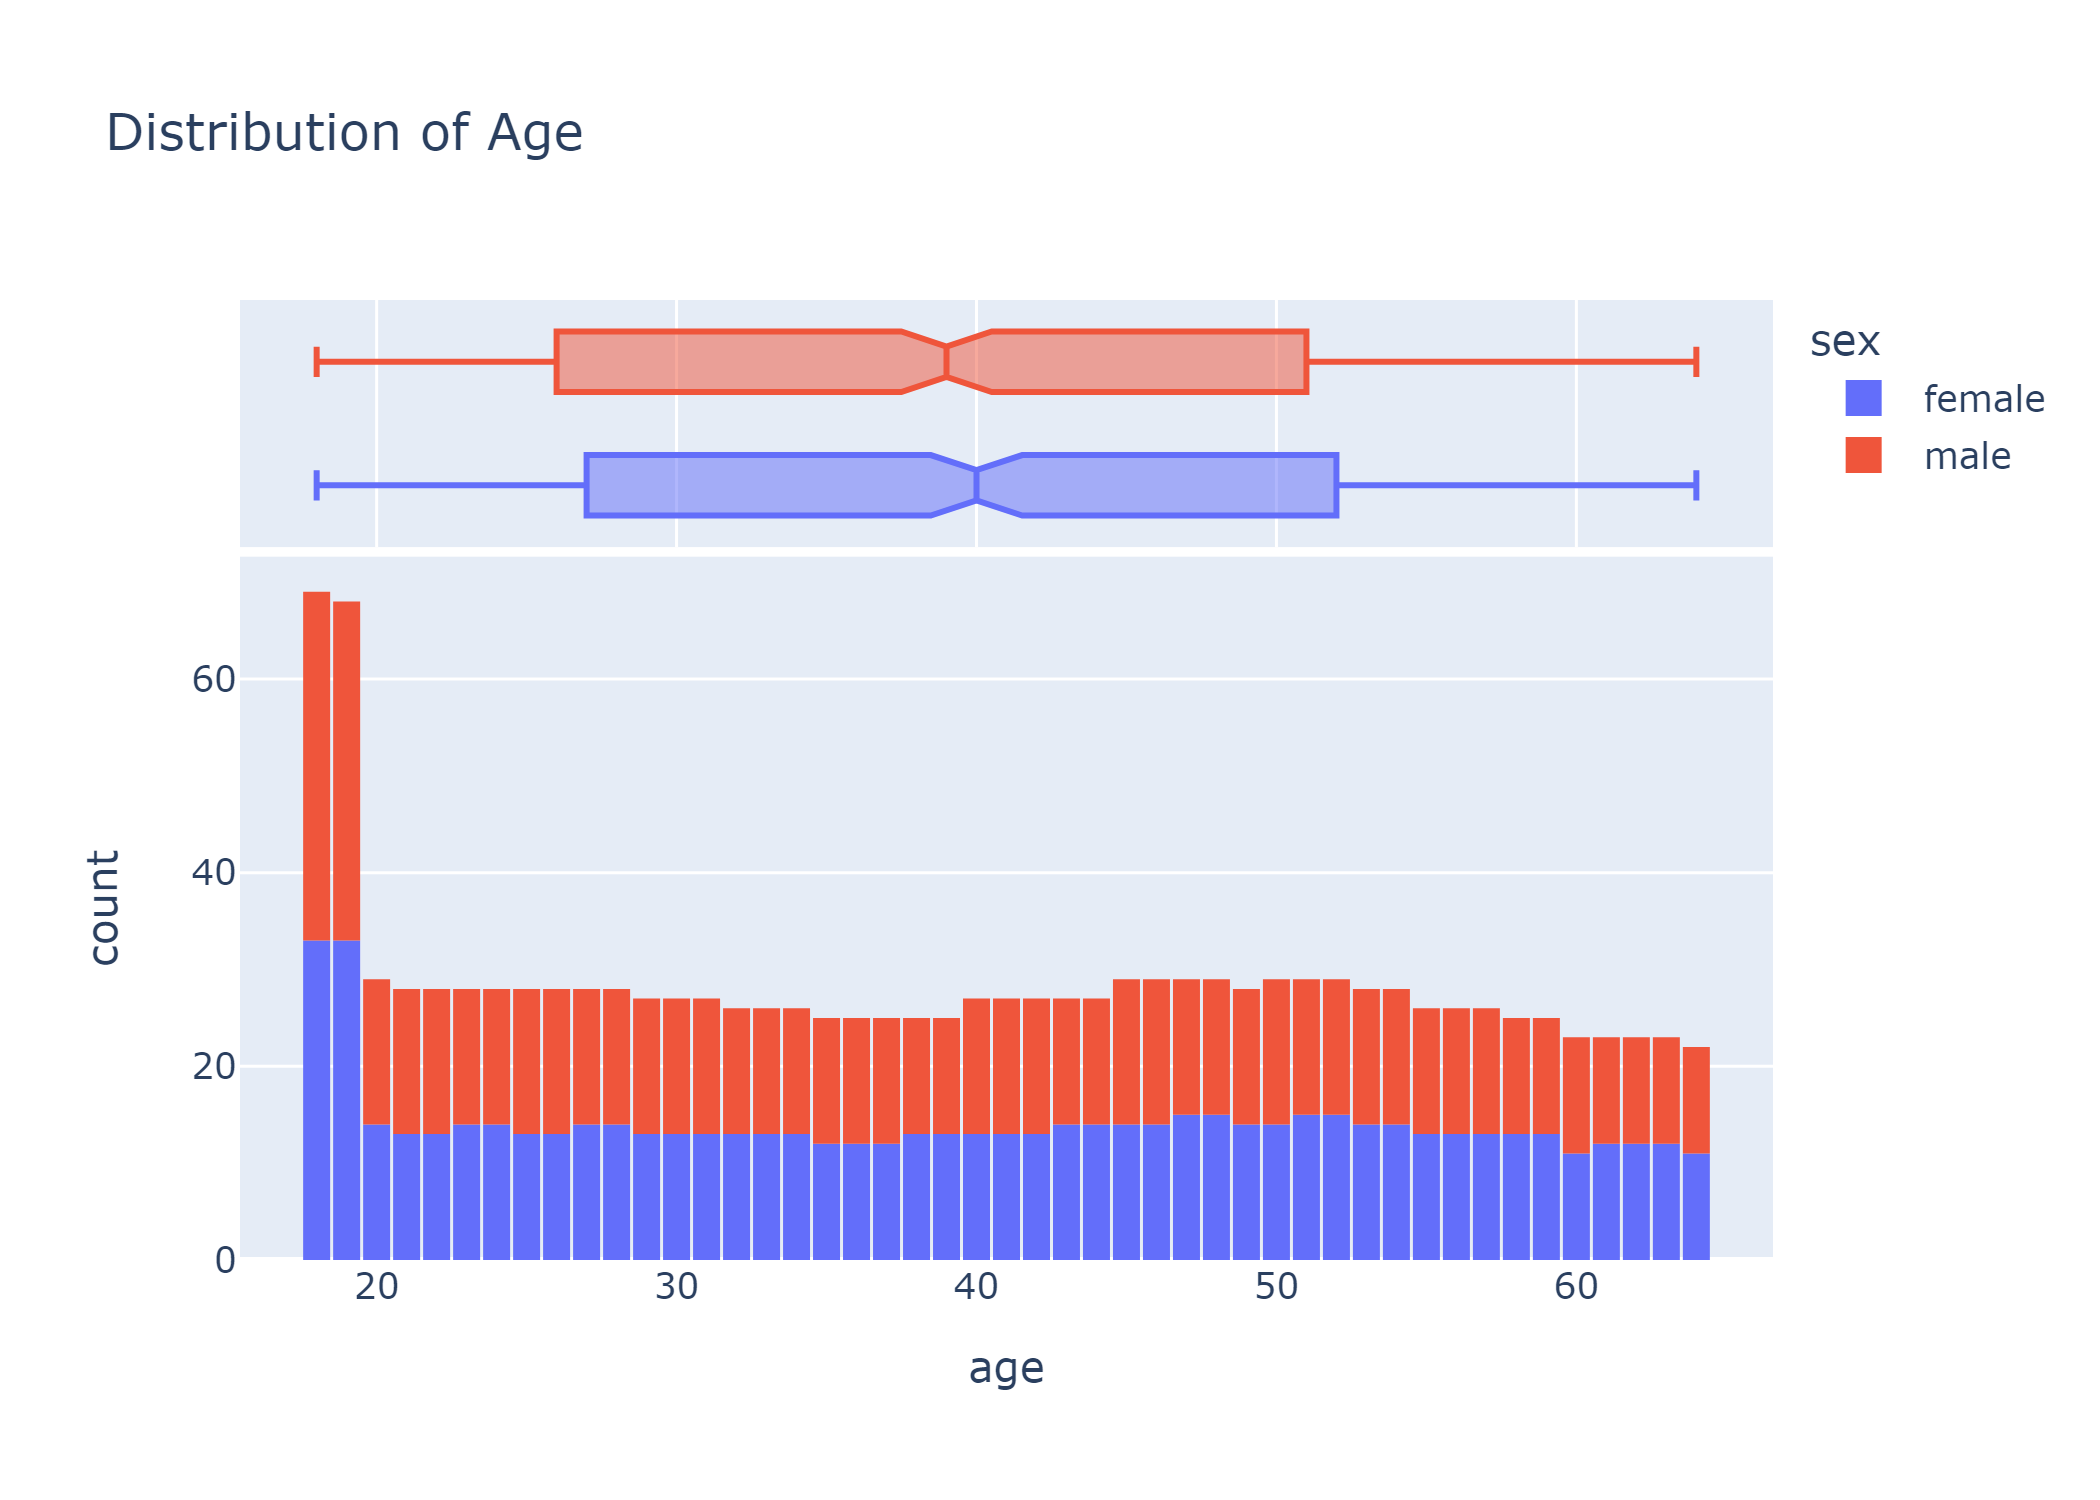

In [7]:
fig = px.histogram(df,x='age',marginal='box',color='sex',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Distribution of Age

The dataset includes individuals from various age groups, with the largest portion falling within the 18-20 year age range.

The gender distribution is nearly balanced across all age ranges.

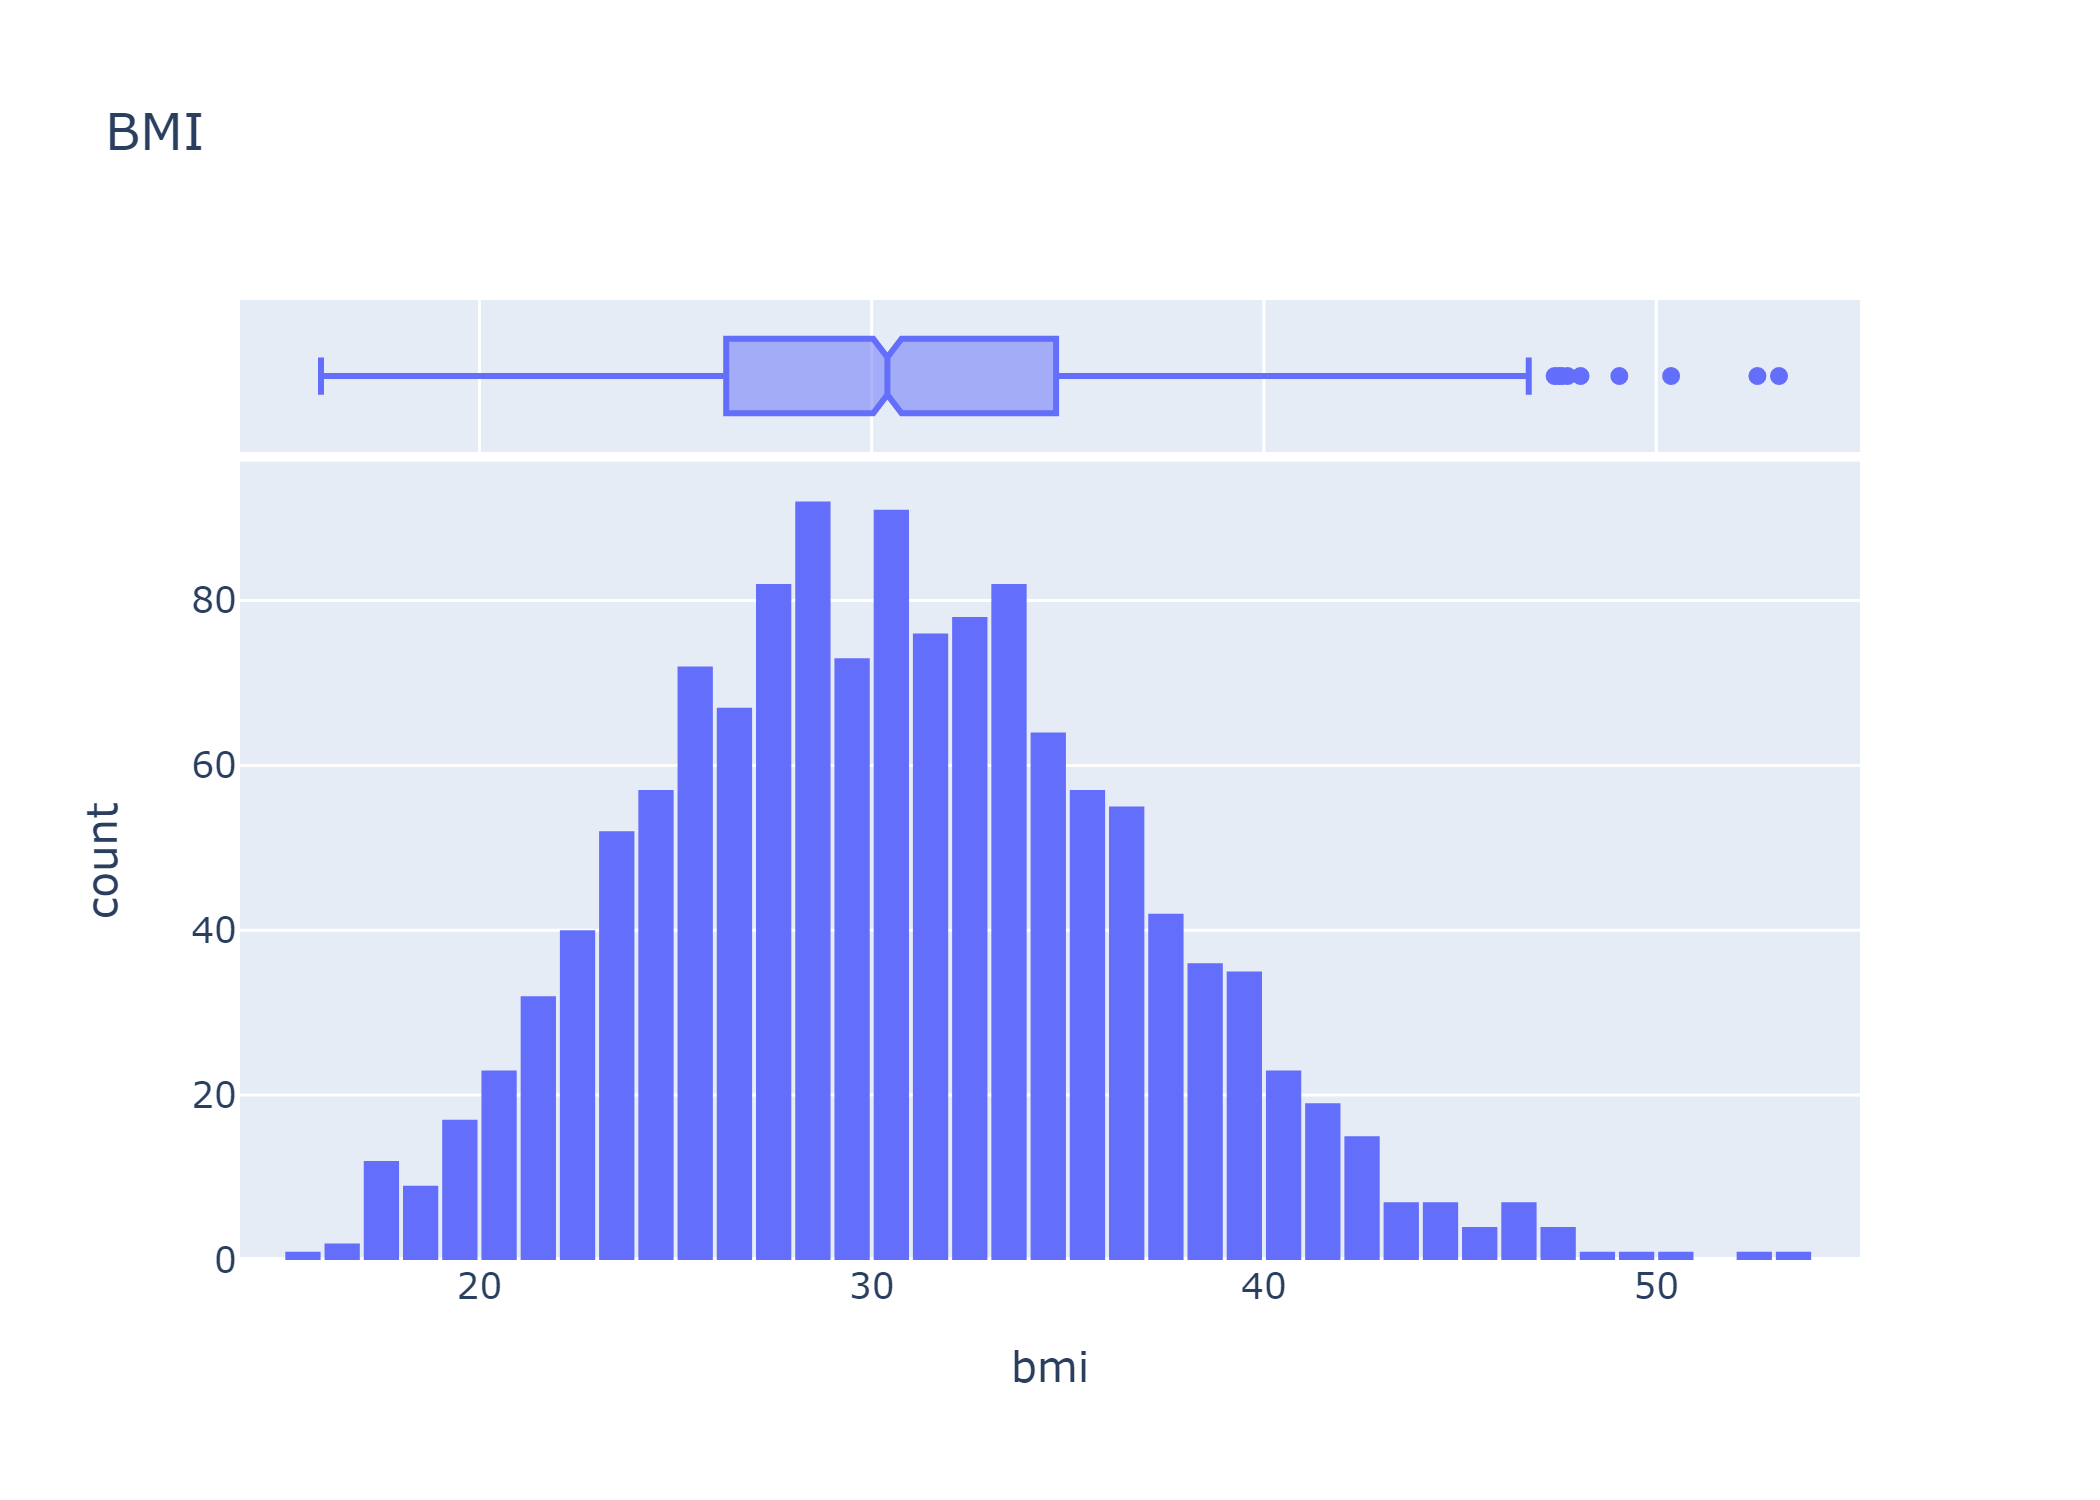

In [8]:
fig=px.histogram(df,x='bmi',marginal='box',nbins=47,title="BMI")
fig.update_layout(bargap=0.1)
fig.write_image("plot.png",scale=3)
Image("plot.png")

# BMI

The BMI of the entire population forms a normal distribution.

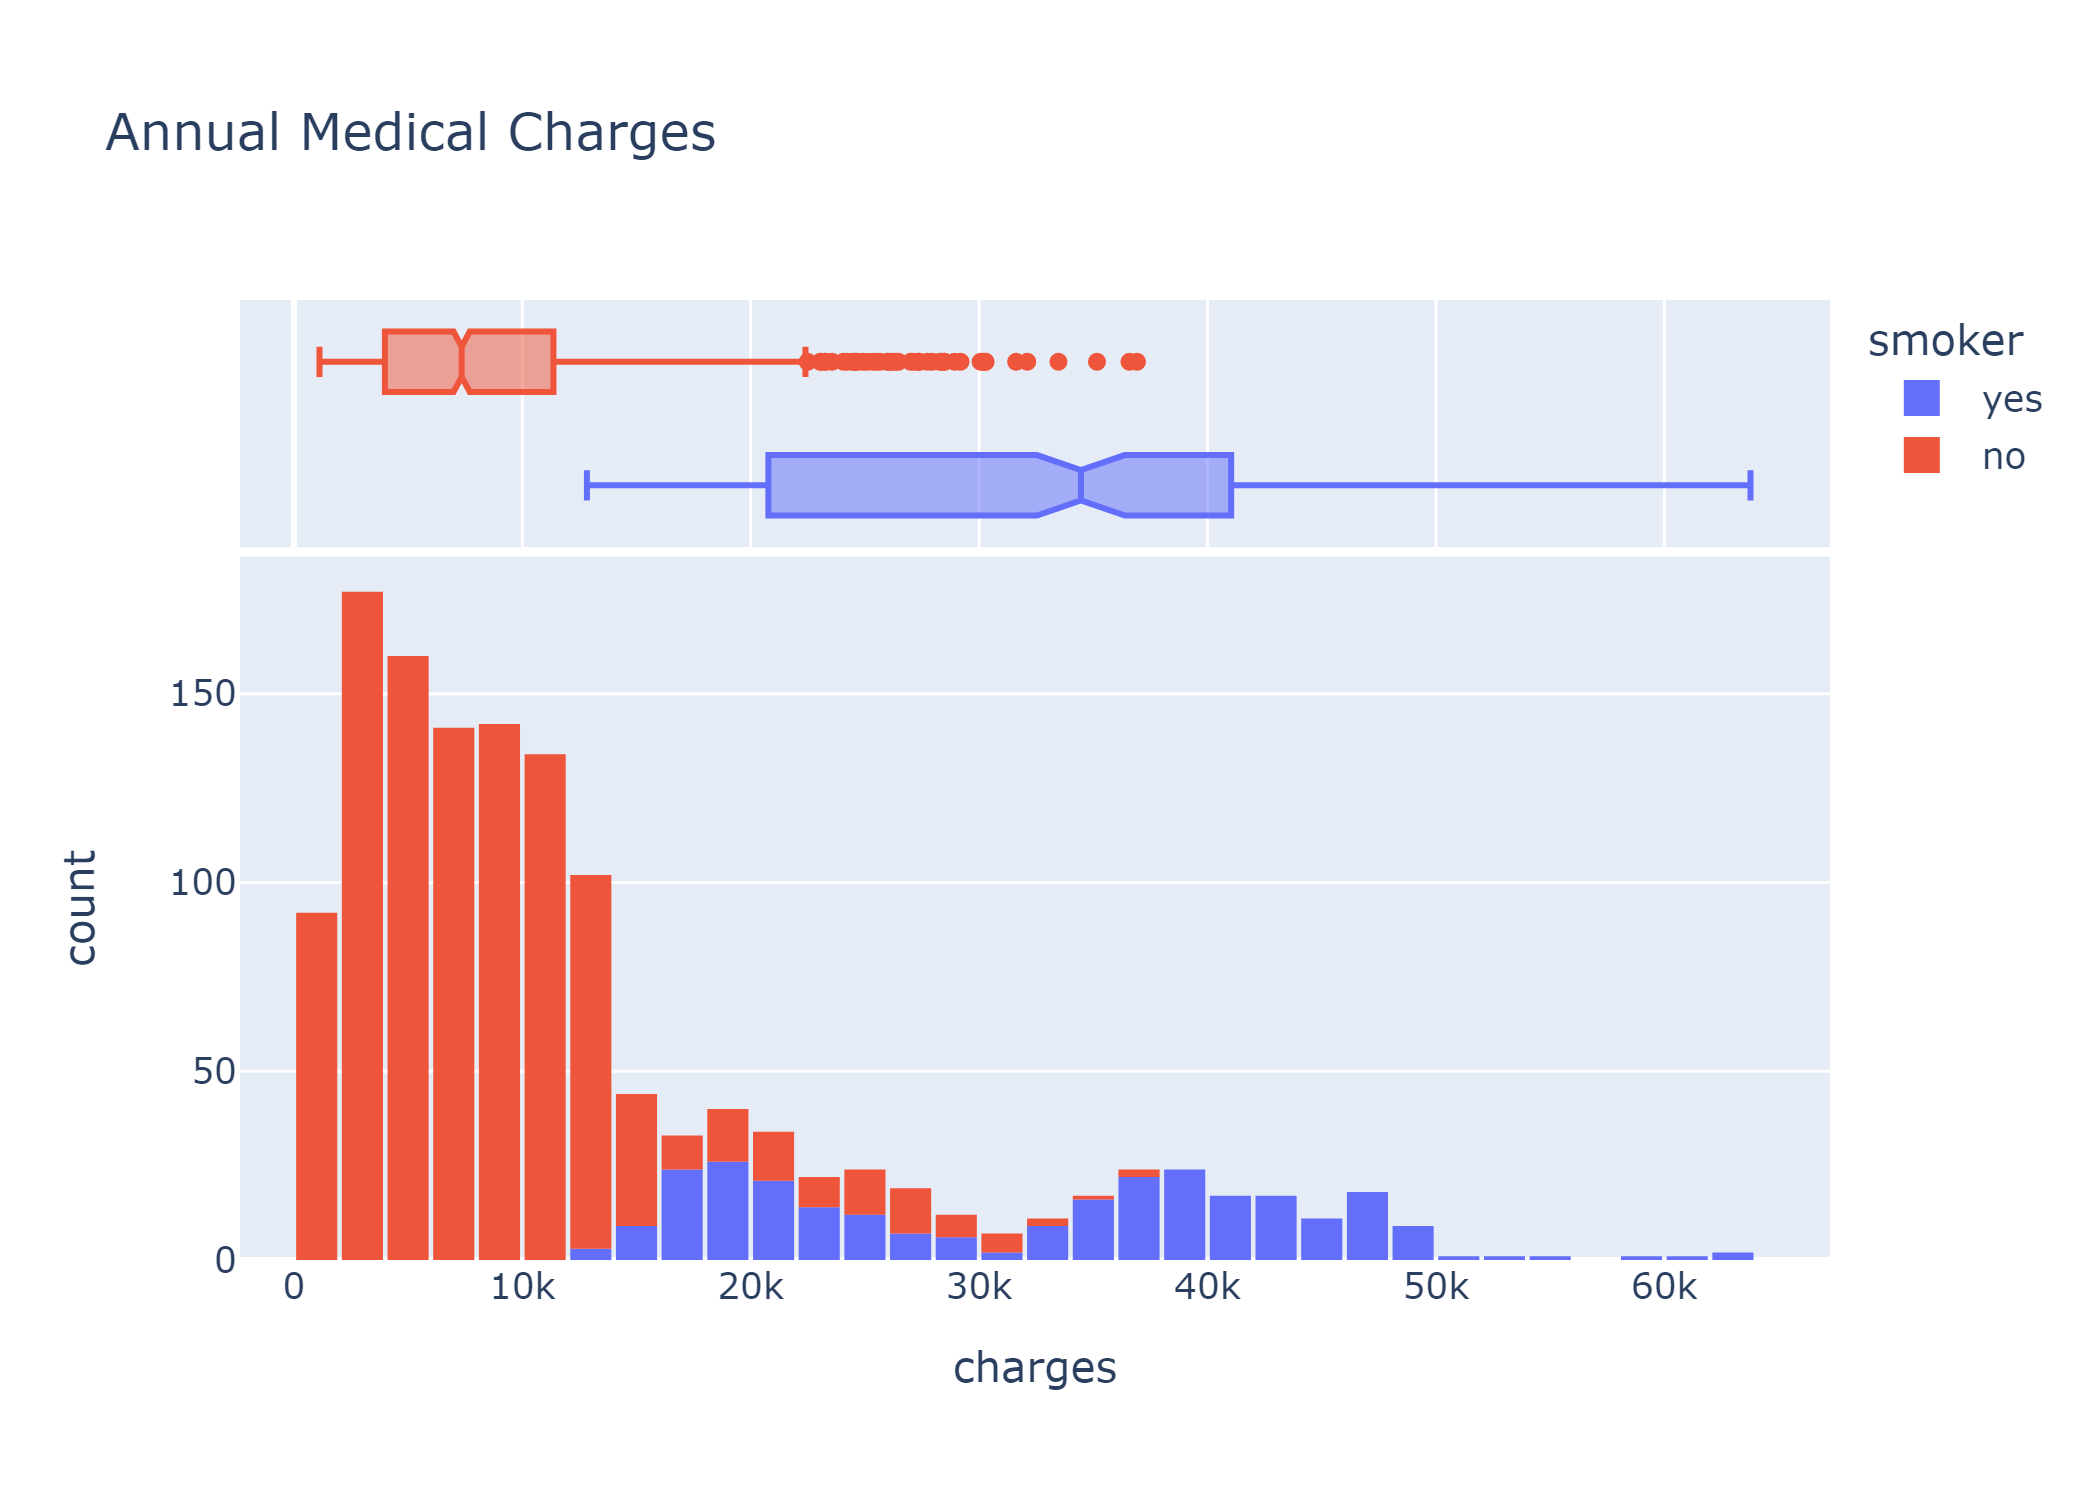

In [9]:
fig=px.histogram(df,x='charges',marginal='box',nbins=47,color='smoker',title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Annual Medical Charges

Non-smokers generally tend to have lower annual medical expenses compared to smokers. Conversely, smokers typically incur higher annual medical costs.

Additionally, the dataset contains a larger proportion of individuals who do not smoke.

In [10]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

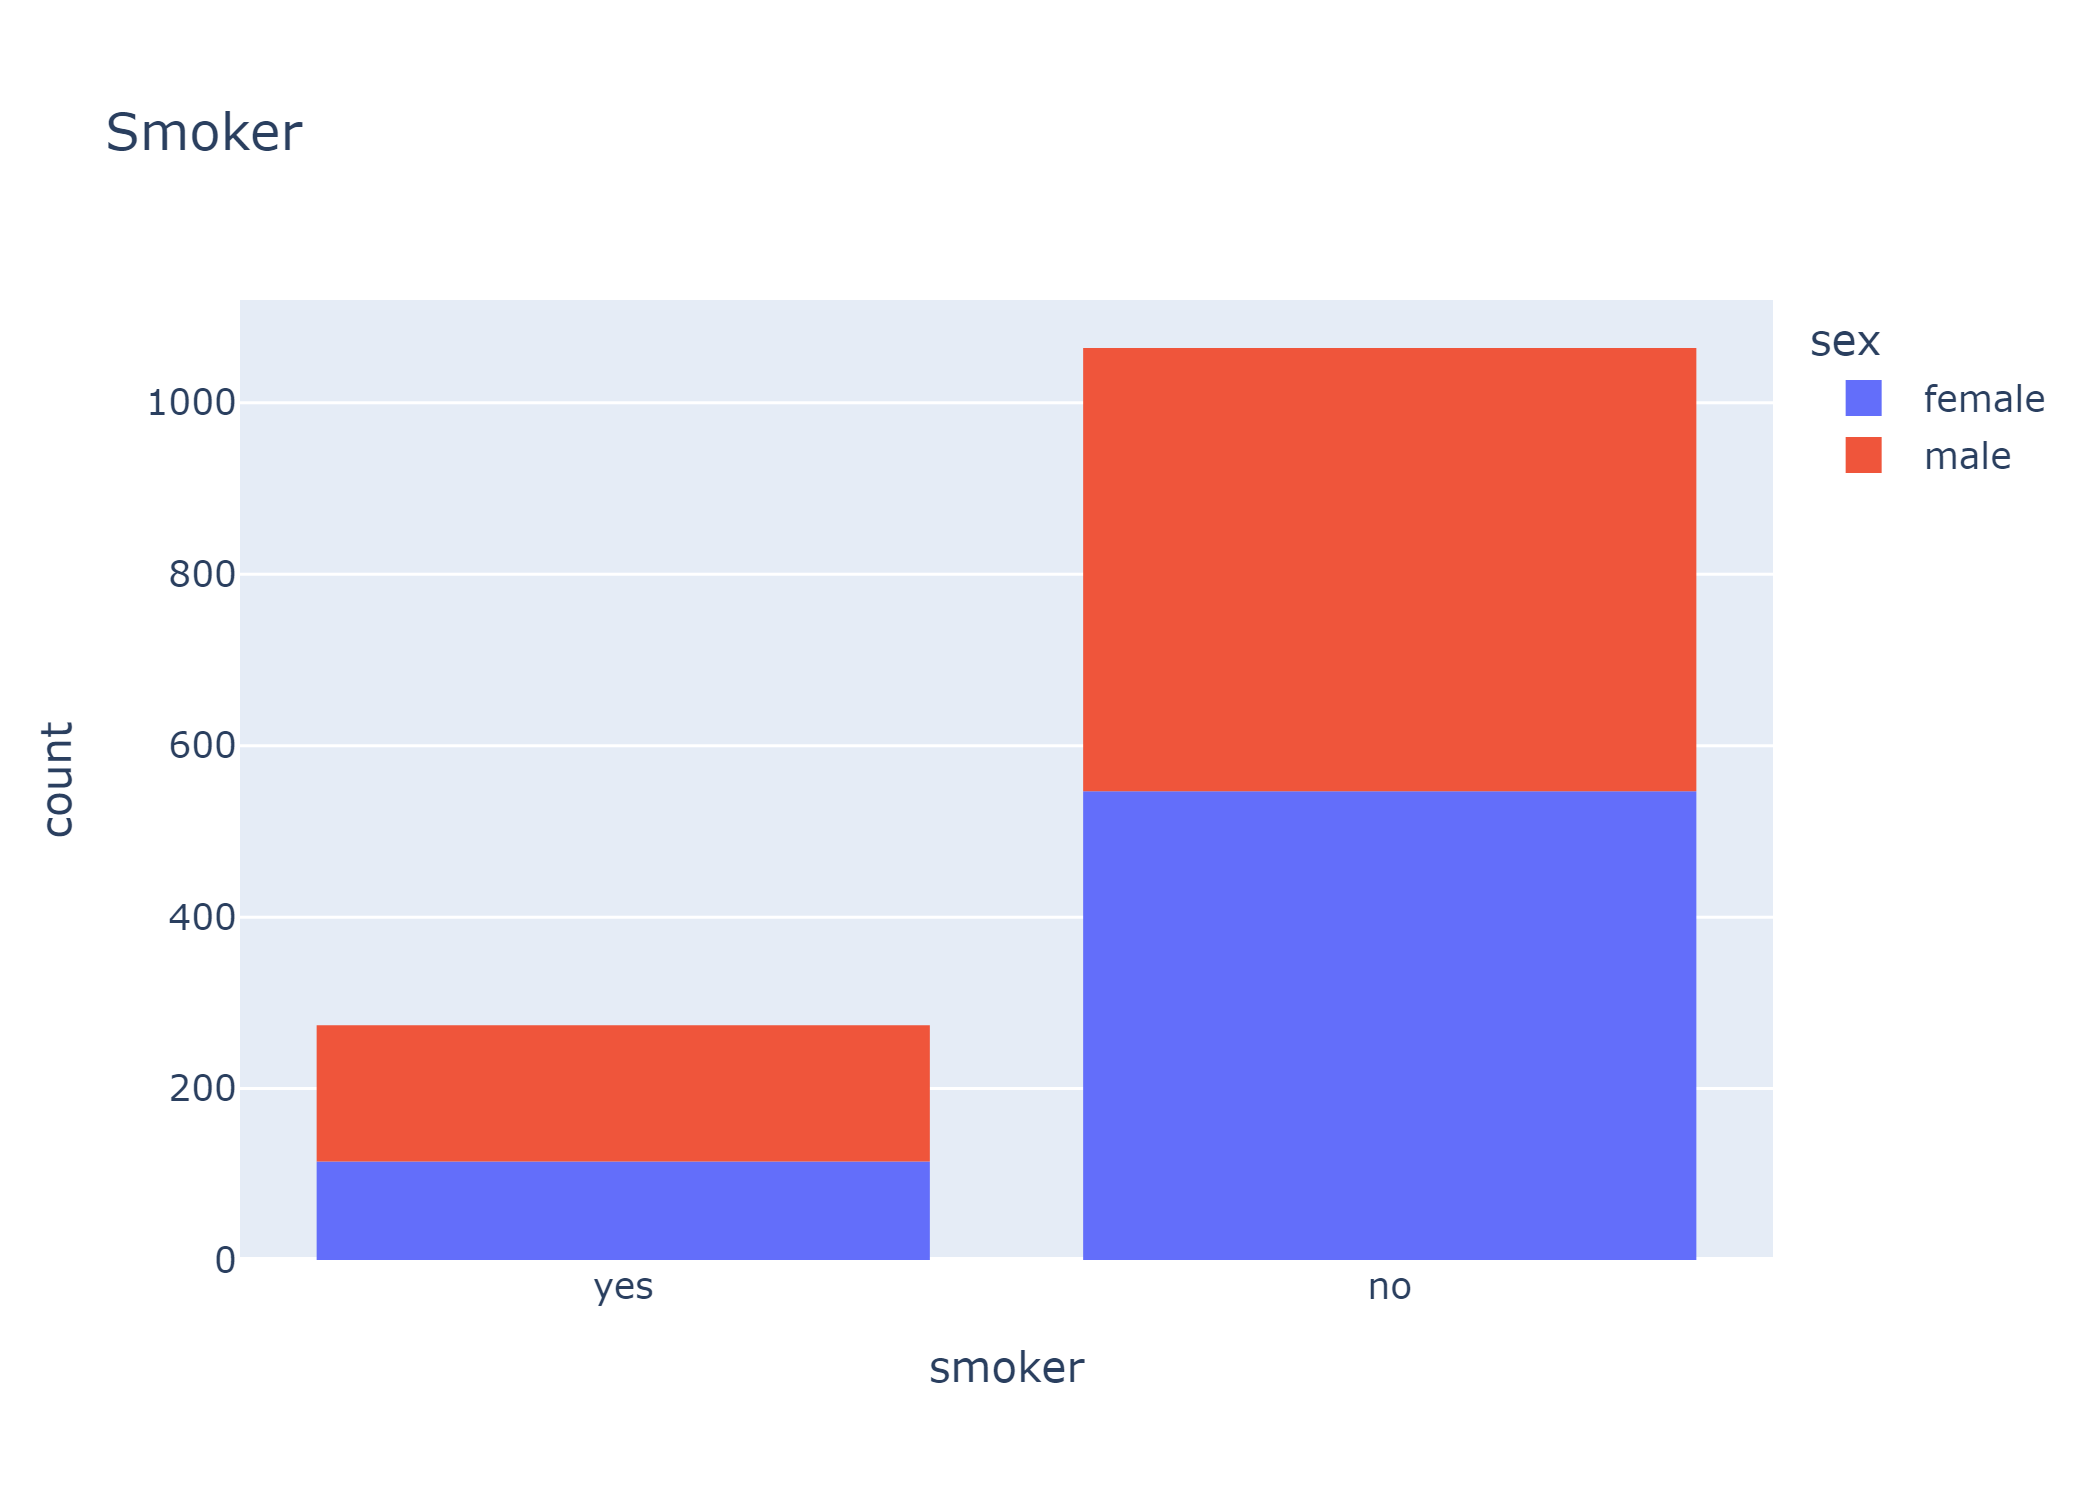

In [11]:
fig=px.histogram(df,x='smoker',color='sex',title='Smoker')
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Smoker

The data set contains more number of non smokers.

There is an equal distribuition of Males and Females, between smokers and non smokers. 

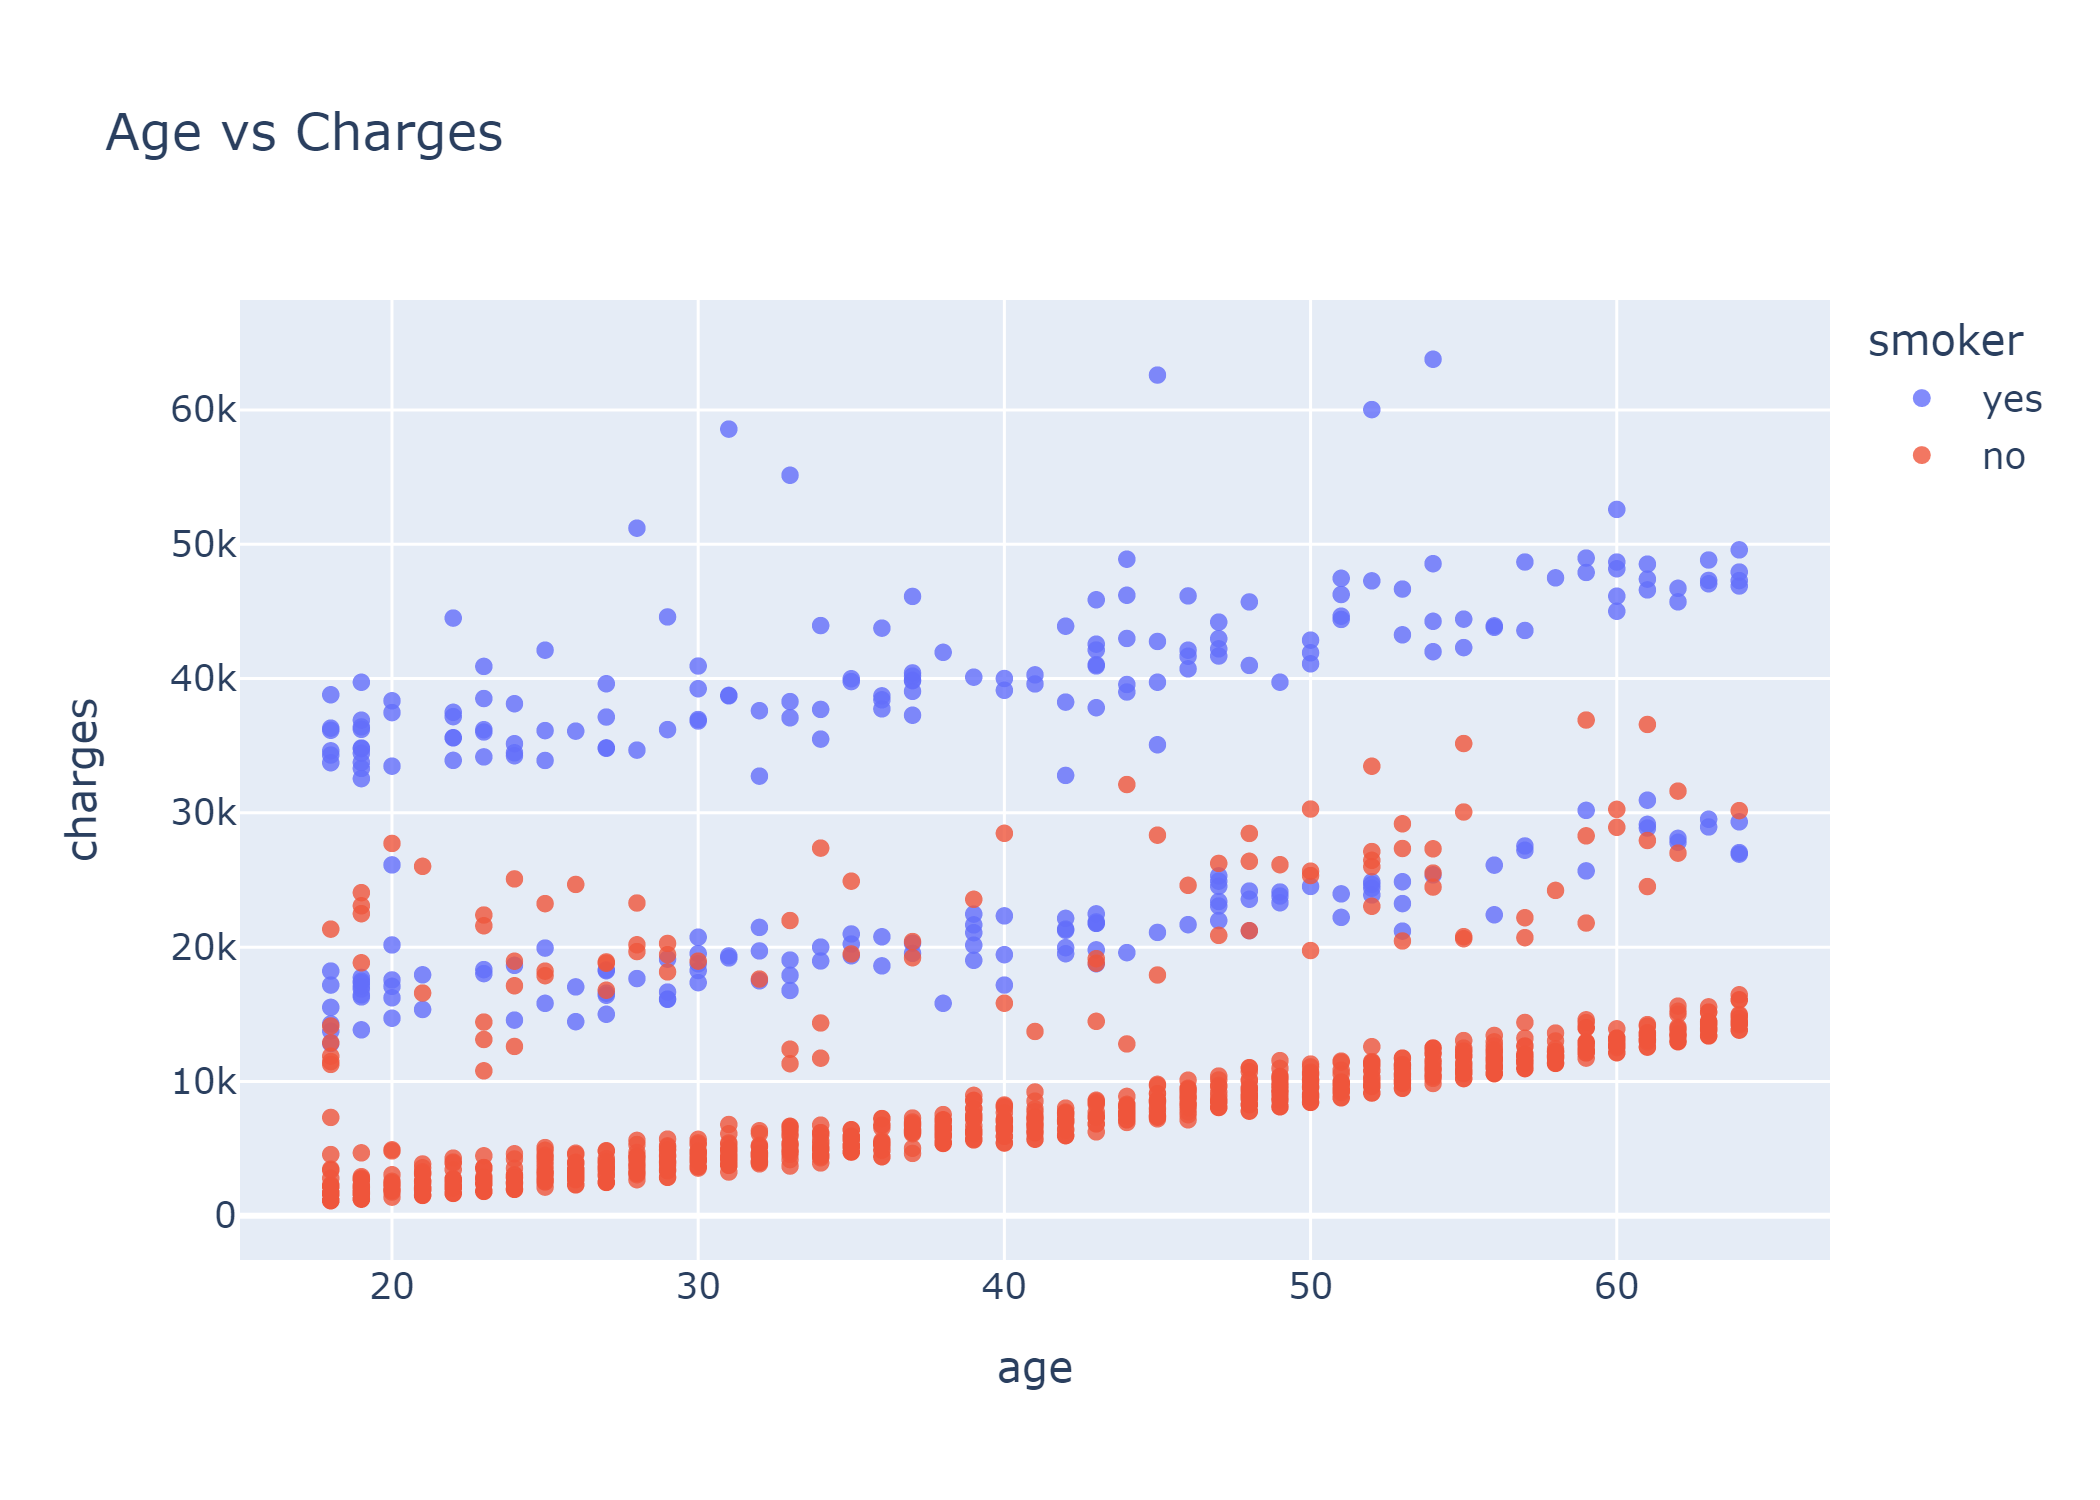

In [12]:
fig=px.scatter(df,x='age',y='charges',hover_data=['sex'],color='smoker',opacity=0.8,title='Age vs Charges')
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Age vs Charges

The cost of insurance goes up as people get older. Smokers generally pay more because of the health risks. However, even non-smokers are seeing their insurance costs go up over time. This might be due to reasons other than smoking.

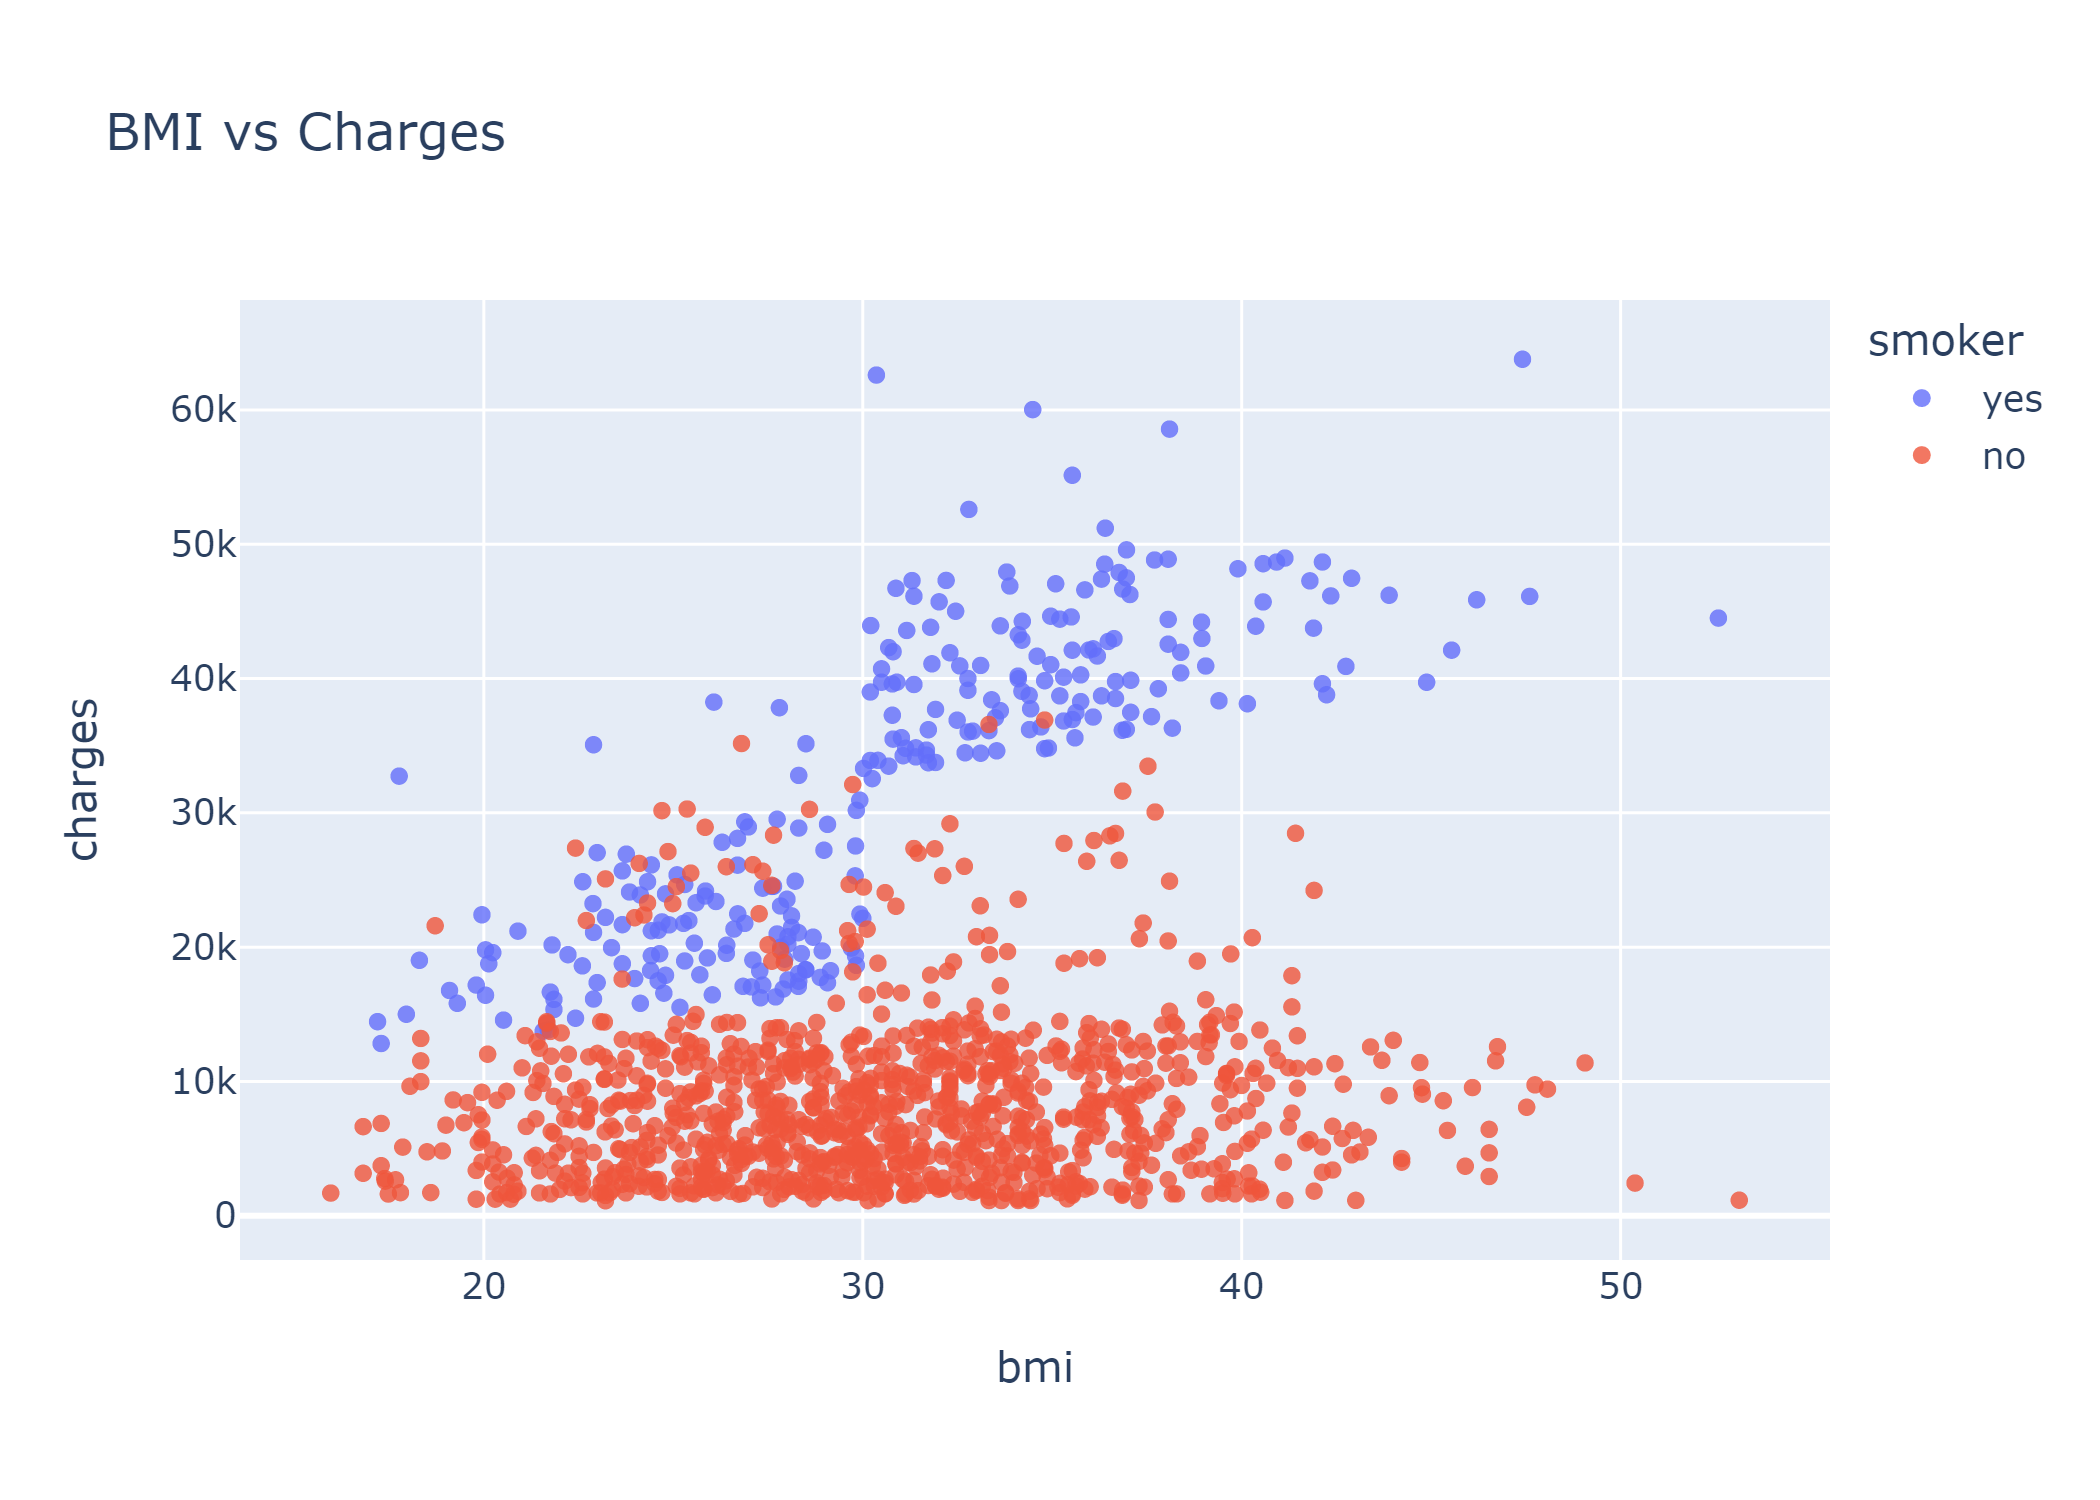

In [13]:
fig=px.scatter(df,x='bmi',y='charges',hover_data=['sex'],color='smoker',opacity=0.8,title='BMI vs Charges')
fig.write_image("plot.png",scale=3)
Image("plot.png")

# BMI vs Charges

There is no evident relationship between the BMI and charges for non-smokers, but we can observe a positive relationship between the same, in case of smokers.

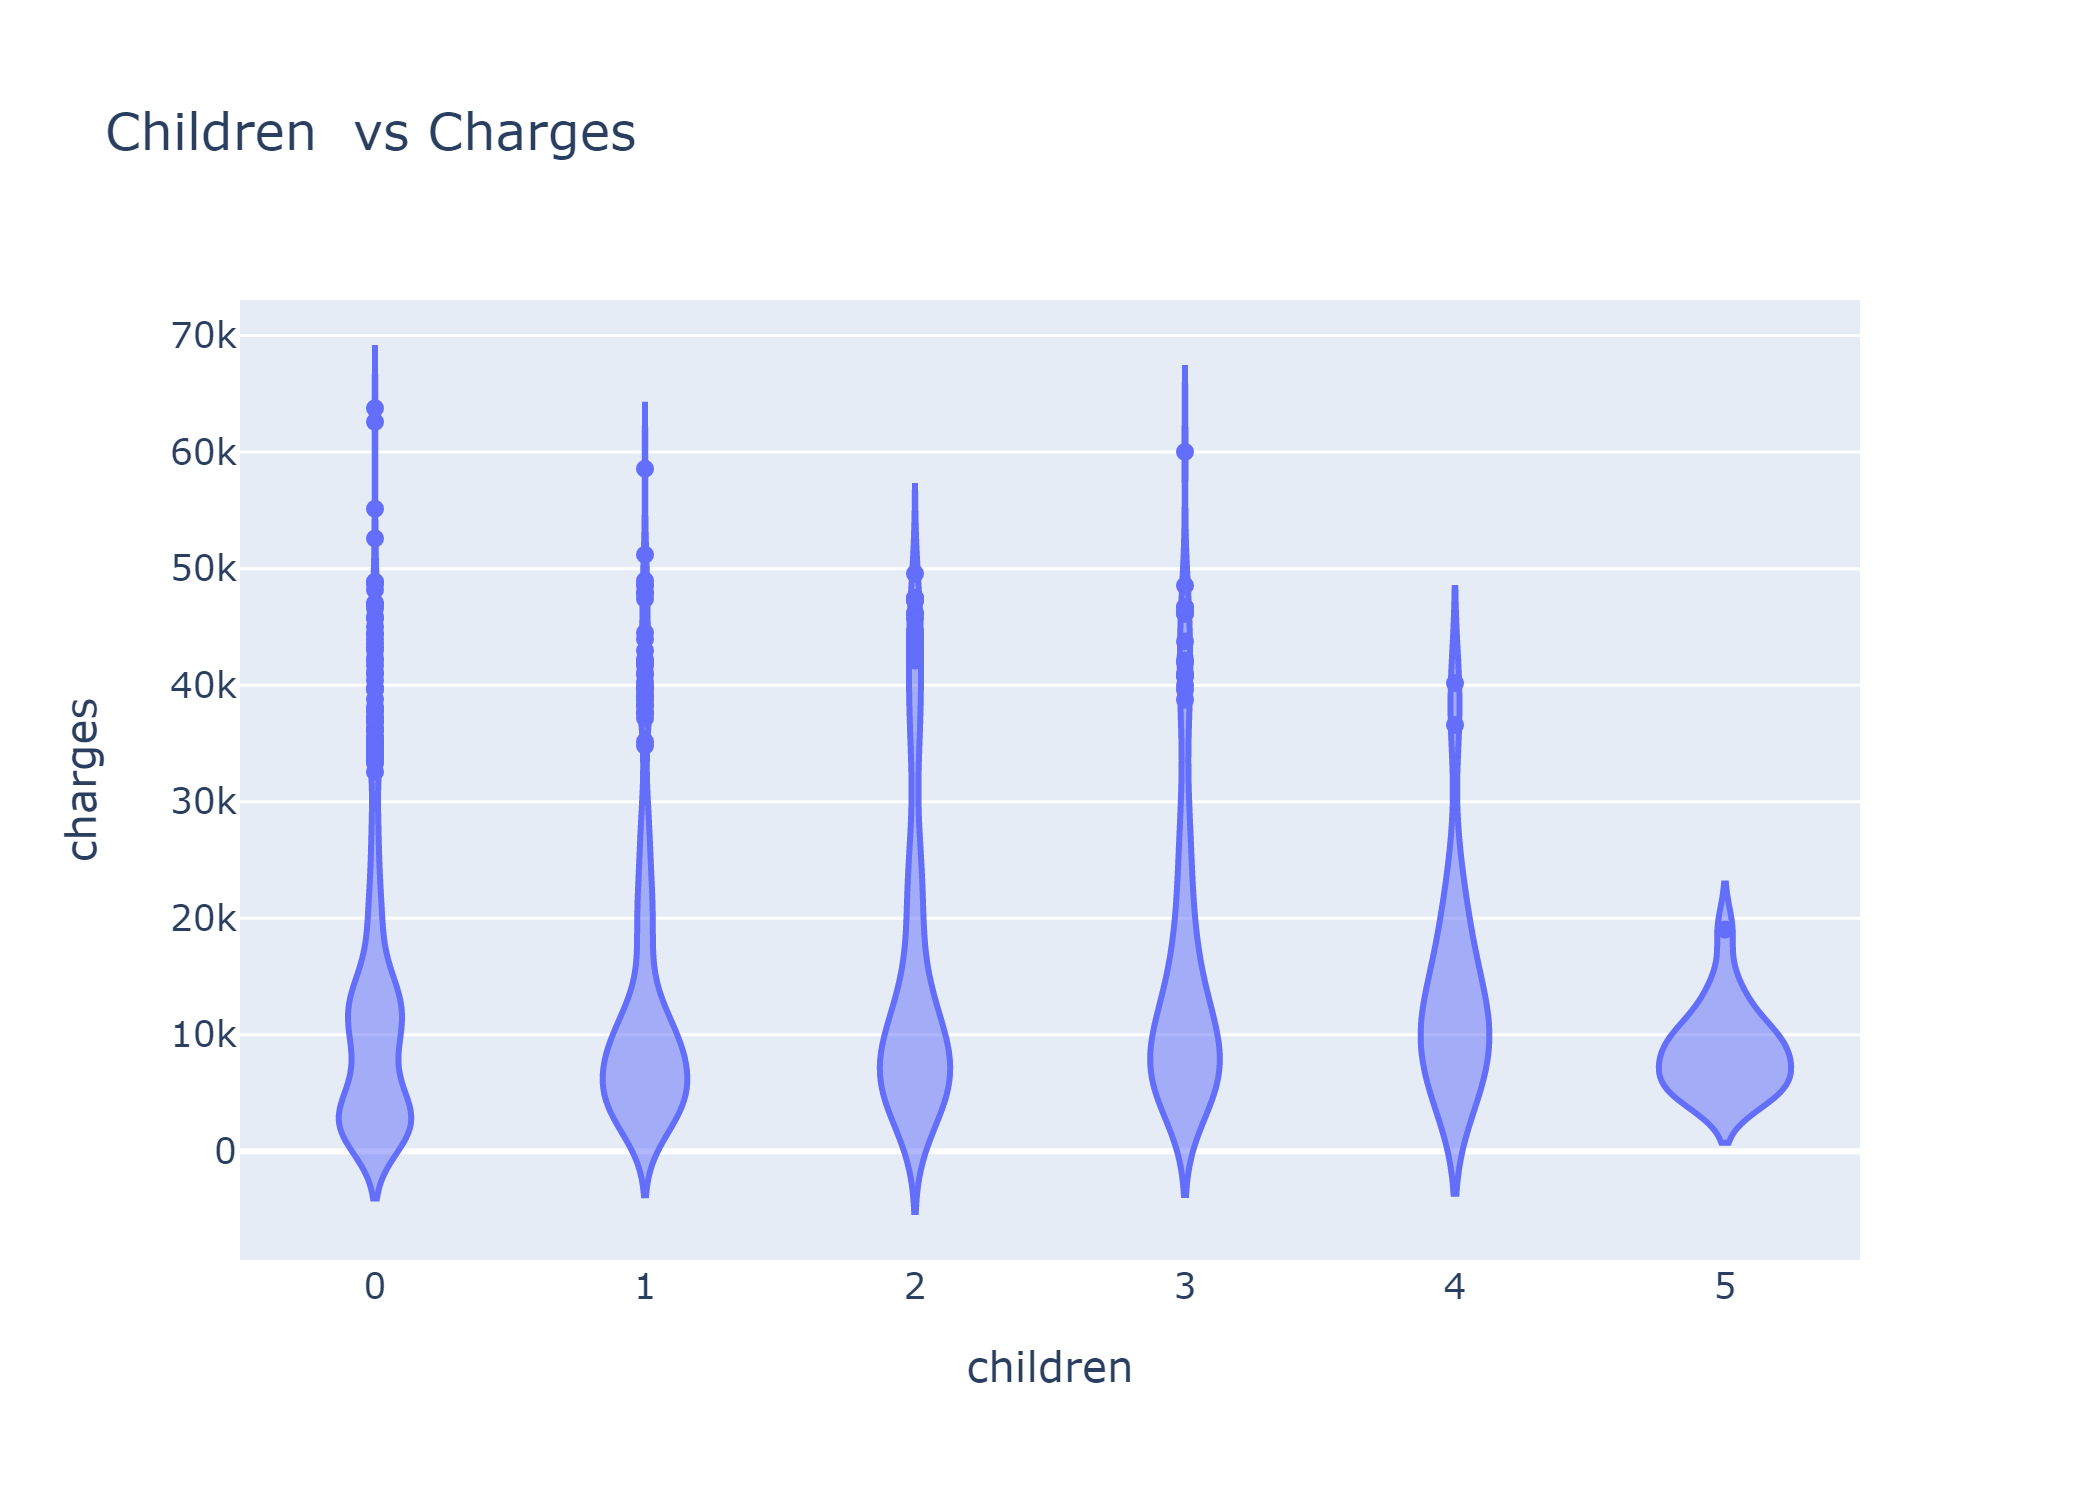

In [14]:
fig=px.violin(df,x='children',y='charges',title='Children  vs Charges')
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Children vs Charges

There is an almost same amount charged from people, no matter how many children they have, with an exception of some outliers.

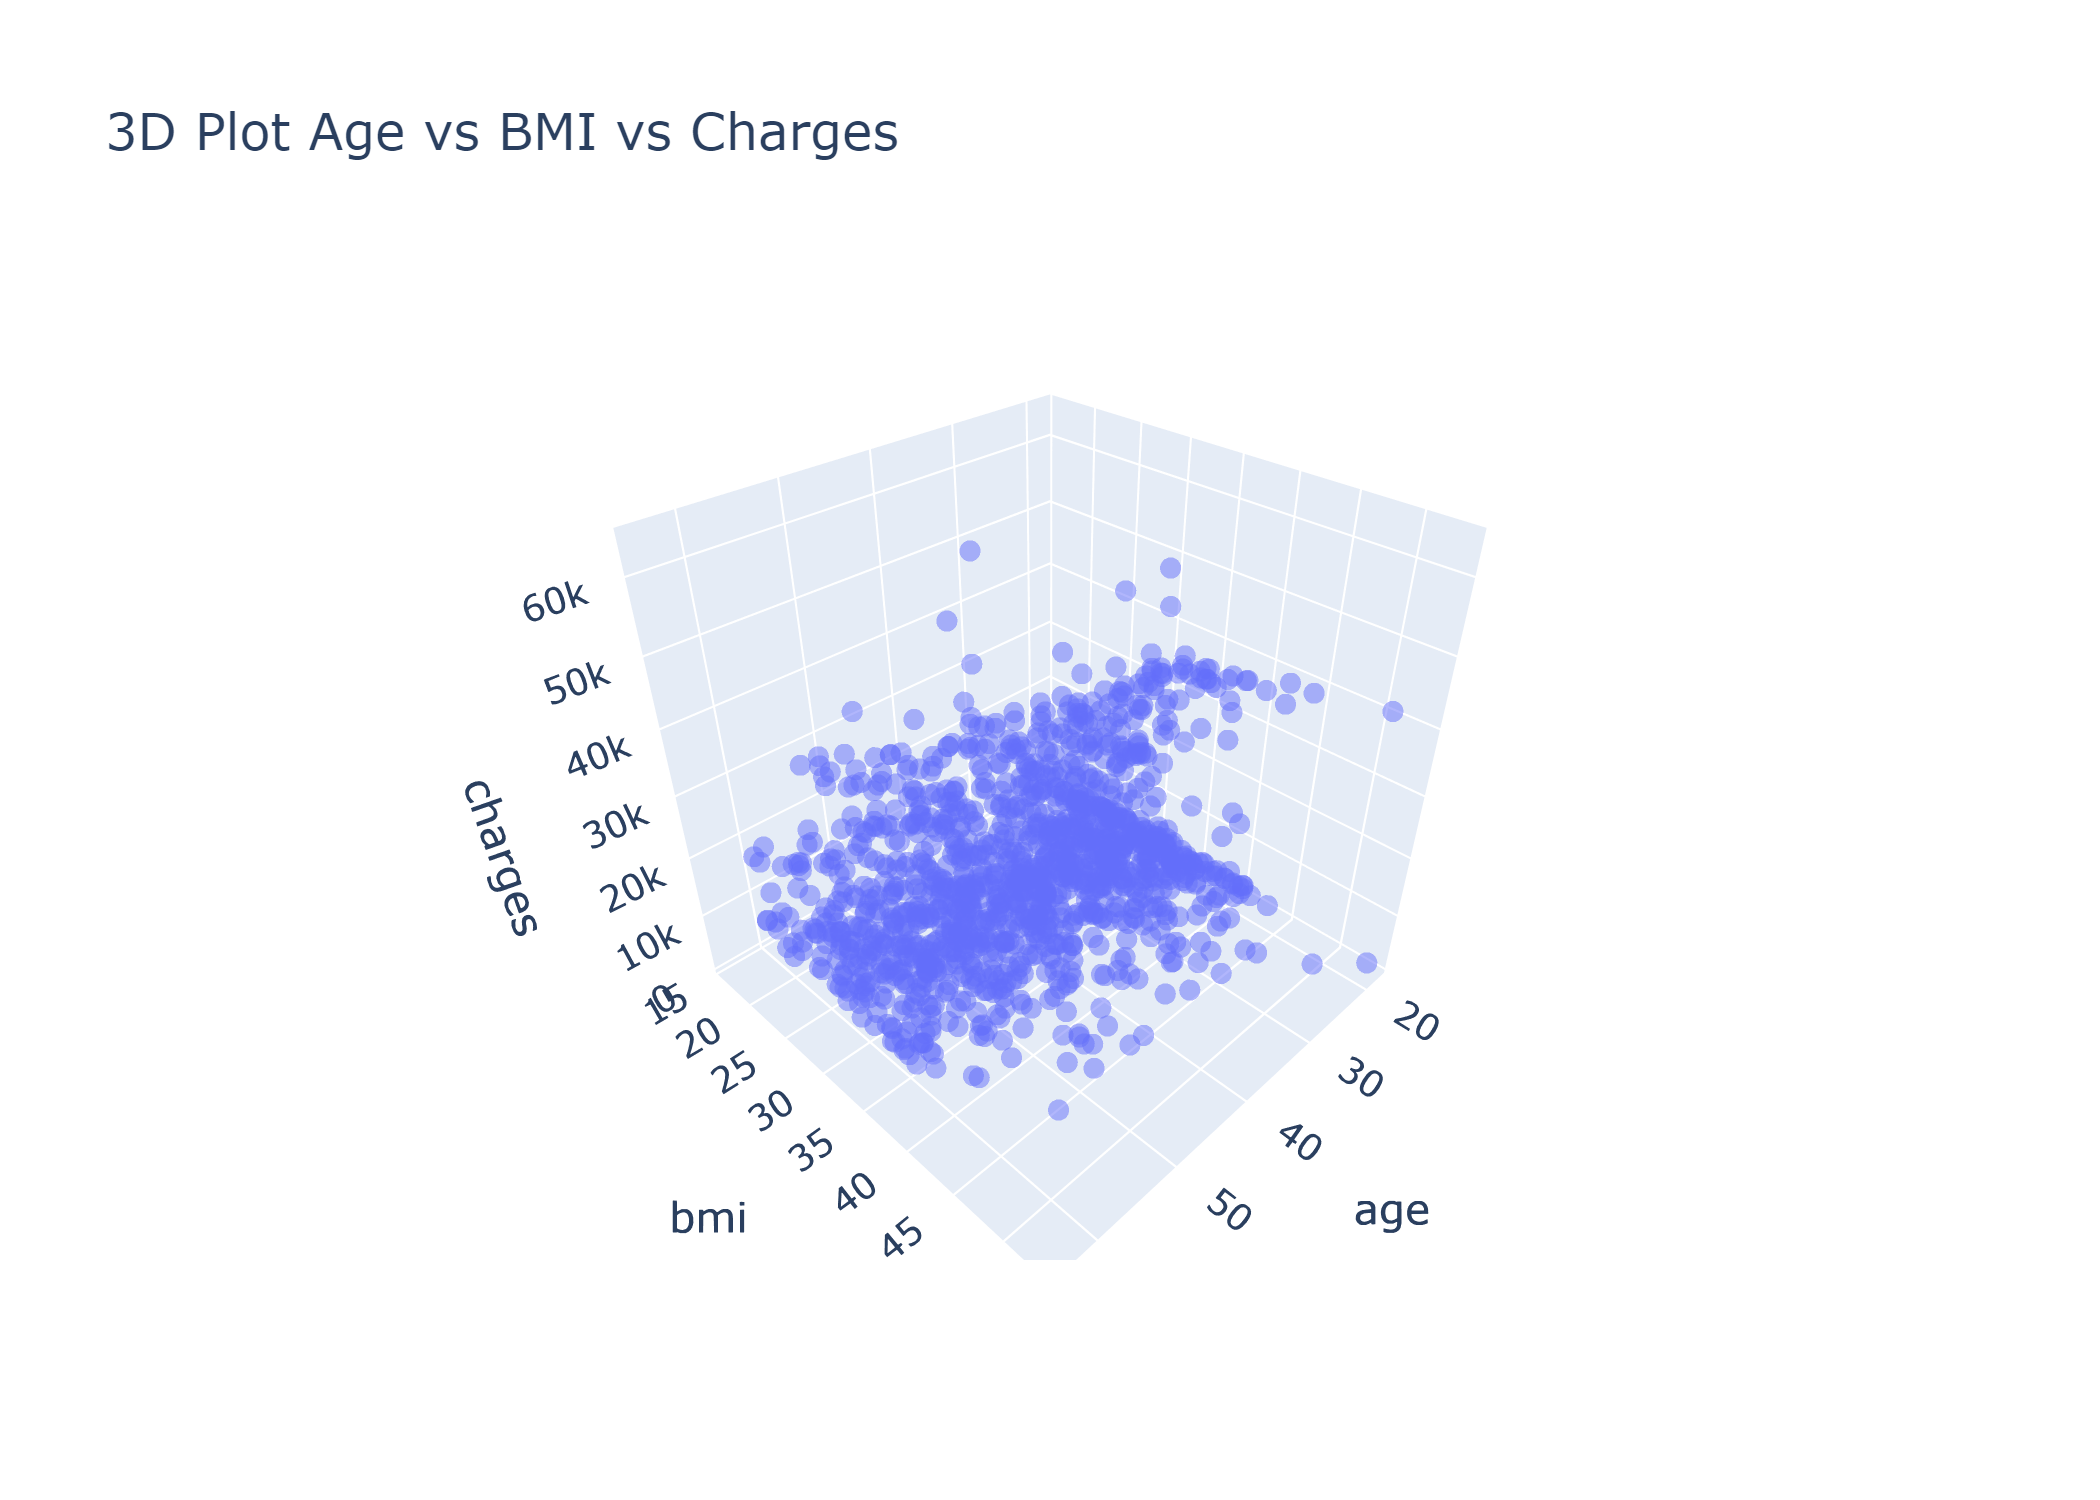

In [15]:
fig=px.scatter_3d(df,x='age',y='bmi',z='charges', title='3D Plot Age vs BMI vs Charges')
fig.update_traces(marker_size=4,marker_opacity=0.5)
fig.write_image("plot.png",scale=3)
Image("plot.png")

# Correlation

Charges and age are somewhat related, with a correlation coefficient of about 0.3

Charges and BMI are somewhat related, with a correlation coefficient of about 0.2

Charges and children are hardly related, with a correlation coefficient of about 0.06

Charges and smoking are strongly related, with a correlation coefficient of about 0.8

In [16]:
 df.charges.corr(df.age)

0.2990081933306476

In [17]:
df.charges.corr(df.bmi)

0.19834096883362884

In [18]:
df.charges.corr(df.children)

0.06799822684790487

In [19]:
smoker_value={'no':0,'yes':1}
smoker_numeric=df.smoker.map(smoker_value)
df.charges.corr(smoker_numeric)

0.7872514304984767

In [20]:
cor=df.corr()
cor

C:\Users\alika\AppData\Local\Temp\ipykernel_22220\3865792743.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


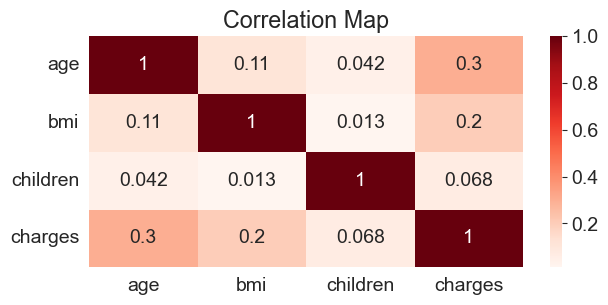

In [21]:
sns.heatmap(cor,annot=True,cmap='Reds').set(title='Correlation Map')
plt.show()

# Separating input and target data

In [22]:
input_feat=df.drop(columns='charges')
input_feat

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [23]:
target_feat=df['charges']
target_feat

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Splitting the data into 'train' and 'test'

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
input_train,input_test,target_train,target_test=train_test_split(input_feat,target_feat,test_size=0.2,random_state=36)

# Dividing the data into numeric and categorical

In [26]:
num_cols=input_feat.select_dtypes(np.number).columns.tolist()
num_cols

['age', 'bmi', 'children']

In [27]:
cat_cols=input_feat.select_dtypes(object).columns.tolist()
cat_cols

['sex', 'smoker', 'region']

# Scaling the numeric columns

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler()

In [30]:
scaler.fit(df[num_cols])

MinMaxScaler()

In [31]:
input_train[num_cols]=scaler.transform(input_train[num_cols])
input_test[num_cols]=scaler.transform(input_test[num_cols])

# Encoding the categorical columns

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [34]:
encoder.fit(df[cat_cols])

C:\Users\alika\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [35]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [36]:
enc_cols=encoder.get_feature_names_out(cat_cols).tolist()
enc_cols

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [37]:
input_train[enc_cols]=encoder.transform(input_train[cat_cols])
input_test[enc_cols]=encoder.transform(input_test[cat_cols])

In [38]:
input_train.drop(columns=['sex','smoker','region',],inplace=True)
input_test.drop(columns=['sex','smoker','region',],inplace=True)

# Training a Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

In [41]:
model.fit(input_train,target_train)

LinearRegression()

In [42]:
pred=model.predict(input_test)
pred

array([ 7360., 13024., 14560.,  4928.,  4064.,  7392.,  6368., 39392.,
         512.,  7488.,  1536., 30464., 10080., 15616.,  2816.,   992.,
       12256., 11008.,  8960.,  5568., 12544.,   992.,  6016.,  7616.,
       32000., 27616.,  4224.,  1536., 40128., 14720., 33728., 15488.,
       14400.,  9248., 38080.,   192., 10528., 11072., 12704.,  5824.,
       18368.,  3456.,  4160.,  3744.,  3456., 10720.,  8320., -1760.,
        2592., 11264., 10272., 15936.,  8800., 11008., 19488., 10944.,
       12096., 10240.,  6912.,  9216.,  1120., 11392.,  5824.,  4192.,
       27968., 15808.,  4000.,  2720.,  6816.,  9152.,  9088.,  9504.,
        5184., 14208.,  5696., 17024., 14176., 11008., 12928., 27840.,
        1536., 12512., 11744., 11904., 15264.,  9408., 16608.,  8768.,
        8384.,  6976., 11840.,  3488.,  2592.,  7392.,  7872., 10240.,
       10816., 10816., 14848.,  5760.,  2848., 11936.,  8384., 10464.,
       27264.,  5600.,   320., 25504., 14464., 36960.,  4928.,  8960.,
      

In [43]:
from sklearn import metrics

In [44]:
np.sqrt(metrics.mean_squared_error(pred,target_test))

5366.824513616024

In [45]:
metrics.r2_score(pred,target_test)

0.6977165449749261

This model has a root mean squared error of about 5300.

In [46]:
df['charges'].min()

1121.8739

In [47]:
df['charges'].max()

63770.42801

Considering the minimum and maximum values of 'charges', 5300 as a mean squared error is a good value. 